Build a regression model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [3]:
# Loading the final data file 
final_data = pd.read_csv('data/final_merged_bike_station_data.csv')

In [5]:
# Define the dependent variable (target) and independent variables (predictors)
X = final_data[['distance_x', 'latitude_x', 'longitude_x']]  # Predictor variables (POI characteristics)
y = final_data['Bikes available']  # Dependent variable (number of bikes available)

# 2. Add a constant to the independent variables (for the intercept in the model)
X = sm.add_constant(X)

Provide model output and an interpretation of the results. 

In [6]:

#  Fit the regression model
model = sm.OLS(y, X)  # OLS stands for Ordinary Least Squares regression
results = model.fit()

# Show the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Bikes available   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     3578.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:14:23   Log-Likelihood:            -3.4289e+05
No. Observations:              111870   AIC:                         6.858e+05
Df Residuals:                  111866   BIC:                         6.858e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8706.5957     88.001    -98.938      

An R-squared value of 0.088 suggests that the independent variables (the characteristics of the points of interest in the surrounding area) explain only 8.8% of the variance in the number of bikes available at each bike station.

The low R-squared value indicates that the characteristics of the POIs (such as distance, latitude, and longitude) have a relatively weak relationship with the number of bikes available at each station. The model explains very little of the variability in bike availability.This suggests that the number of bikes available at each station is influenced by other factors that are not captured by the current model.


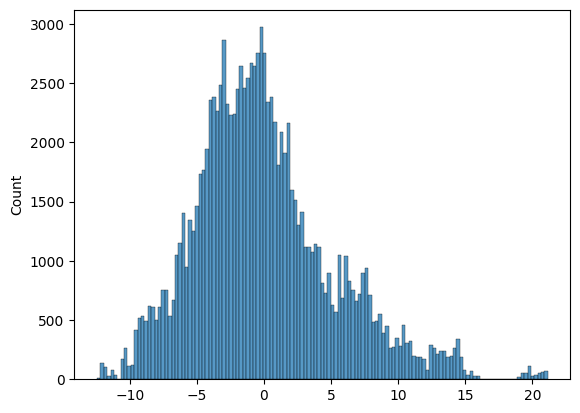

In [7]:
resids = results.resid

sns.histplot(resids)
plt.show()

In [8]:
#the co-efficients
results.params

const         -8706.595679
distance_x       -0.000351
latitude_x      126.591700
longitude_x     -20.120436
dtype: float64

The regression model suggests that distance to POIs negatively impacts bike availability, while latitude positively affects it, and longitude has a negative effect. However, with an R-squared value of 0.088, the model explains only a small portion of the variation in bike availability, indicating that additional factors may be needed to improve predictions.

# Stretch

How can you turn the regression model into a classification model?